In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/Breast_cancer_data.csv')

In [ ]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
import numpy as np

In [ ]:
def entropy(col):
  counts=np.unique(col,return_counts=True)
  ent=0.0
  for ix in counts[1]:
    p=ix/col.shape[0]
    return p
    print(p)

In [ ]:
entropy(df['mean_radius'])

0.0017574692442882249

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
col_name=['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness','diagnosis'	]
pima=pd.read_csv('/content/Breast_cancer_data.csv',skiprows =1,names = col_name)
pima

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [ ]:
X = pima.iloc[:, 0:5]
y = pima.iloc[:, 5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
clf = DecisionTreeClassifier(max_depth=2)

In [ ]:
clf=clf.fit(X_train,y_train)



In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9020979020979021


In [ ]:
import six
import sys
sys.modules['sklearn.externals.six']=six

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO

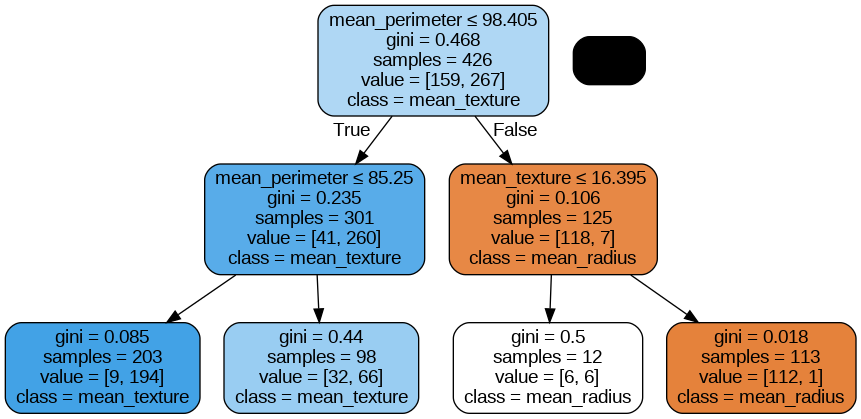

In [ ]:
from IPython.display import Image
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X_train.columns, class_names=df.columns, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
train_scores,test_scores=list(),list()
values = [i for i in range(1,21)]

In [ ]:
from sklearn.metrics import accuracy_score
for i in values:
  model = DecisionTreeClassifier(max_depth=i)
  model.fit(X_train,y_train)
  train_yhat=model.predict(X_train)
  train_acc = accuracy_score(y_train,train_yhat)

  train_scores.append(train_acc)
  test_yhat = model.predict(X_test)
  test_acc= accuracy_score(y_test,test_yhat)
  test_scores.append(test_acc)
  print('>%d,train:%.3f,test:%.3f'%(i,train_acc,test_acc))

>1,train:0.887,test:0.902
>2,train:0.887,test:0.902
>3,train:0.925,test:0.888
>4,train:0.962,test:0.902
>5,train:0.974,test:0.881
>6,train:0.991,test:0.874
>7,train:0.998,test:0.888
>8,train:1.000,test:0.888
>9,train:1.000,test:0.881
>10,train:1.000,test:0.895
>11,train:1.000,test:0.895
>12,train:1.000,test:0.881
>13,train:1.000,test:0.895
>14,train:1.000,test:0.874
>15,train:1.000,test:0.888
>16,train:1.000,test:0.888
>17,train:1.000,test:0.867
>18,train:1.000,test:0.881
>19,train:1.000,test:0.874
>20,train:1.000,test:0.888


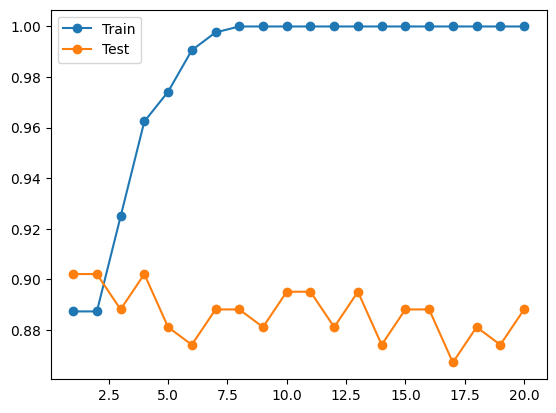

In [ ]:
from matplotlib import pyplot
pyplot.plot(values,train_scores,'-o',label='Train')
pyplot.plot(values,test_scores,'-o',label='Test')
pyplot.legend()
pyplot.show()